In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

### datetime with datetime,numpy and pandas

#### datetime

In [2]:
date = datetime(2020,1,20,13,30,15)
date

datetime.datetime(2020, 1, 20, 13, 30, 15)

In [3]:
print(date.hour)
print(date.day)
print(date.second)
print(date.year)

13
20
15
2020


#### numpy

In [4]:
print (np.array(['2020-03-15','2020-05-18'],dtype='datetime64[M]'))
print (np.array(['2020-03-15','2020-05-18'],dtype='datetime64[Y]'))
print (np.array(['2020-03-15','2020-05-18'],dtype='datetime64[D]'))

['2020-03' '2020-05']
['2020' '2020']
['2020-03-15' '2020-05-18']


In [5]:
np.arange('2222-01-01','2222-01-20',2,dtype='datetime64[D]')

array(['2222-01-01', '2222-01-03', '2222-01-05', '2222-01-07',
       '2222-01-09', '2222-01-11', '2222-01-13', '2222-01-15',
       '2222-01-17', '2222-01-19'], dtype='datetime64[D]')

#### pandas

In [6]:
pd.date_range('2222-01-01',periods=7,freq='M')

DatetimeIndex(['2222-01-31', '2222-02-28', '2222-03-31', '2222-04-30',
               '2222-05-31', '2222-06-30', '2222-07-31'],
              dtype='datetime64[ns]', freq='M')

In [7]:
pd.to_datetime(['1/20/2018','Jan 03, 2018'])

DatetimeIndex(['2018-01-20', '2018-01-03'], dtype='datetime64[ns]', freq=None)

### for other types of date formats

In [24]:
pd.to_datetime('2--1--2020',format='%d--%m--%Y')

Timestamp('2020-01-02 00:00:00')

In [8]:
data=np.random.randn(3,2)
cols=['a','b']
# idx = pd.date_range('2222-01-01',periods=3,freq='D')
idx= np.array(['2020-03-15','2021-05-18','2020-04-15'],dtype='datetime64[D]')
df= pd.DataFrame(data,columns=cols)
df['date'] =idx

In [9]:
df

,a,b,date
0,0.195847,-1.444888,2020-03-15
1,-0.954178,1.865818,2021-05-18
2,-0.830293,-1.700789,2020-04-15


In [10]:
df.set_index('date',inplace=True)
df

,a,b
date,,
2020-03-15,0.195847,-1.444888
2021-05-18,-0.954178,1.865818
2020-04-15,-0.830293,-1.700789


In [11]:
df['month']= df.index.strftime('%B')
df

,a,b,month
date,,,
2020-03-15,0.195847,-1.444888,March
2021-05-18,-0.954178,1.865818,May
2020-04-15,-0.830293,-1.700789,April


In [12]:
df.resample(rule='a').mean()

,a,b
date,,
2020-12-31,-0.317223,-1.572839
2021-12-31,-0.954178,1.865818


### SHIFTING

In [13]:
df.shift(1,freq='Y')

,a,b,month
date,,,
2020-12-31,0.195847,-1.444888,March
2021-12-31,-0.954178,1.865818,May
2020-12-31,-0.830293,-1.700789,April


In [14]:
df2 = pd.DataFrame({"Col1": [10, 20, 15, 30, 45],
...                    "Col2": [13, 23, 18, 33, 48],
...                    "Col3": [17, 27, 22, 37, 52]},
...                   index=pd.date_range("2020-01-01", "2020-01-05",freq='D'))

In [15]:
df2

,Col1,Col2,Col3
2020-01-01,10,13,17
2020-01-02,20,23,27
2020-01-03,15,18,22
2020-01-04,30,33,37
2020-01-05,45,48,52


In [16]:
df2.shift(2)

,Col1,Col2,Col3
2020-01-01,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN
2020-01-03,10.0,13.0,17.0
2020-01-04,20.0,23.0,27.0
2020-01-05,15.0,18.0,22.0


In [17]:
df2.shift(2,freq='M')

,Col1,Col2,Col3
2020-02-29,10,13,17
2020-02-29,20,23,27
2020-02-29,15,18,22
2020-02-29,30,33,37
2020-02-29,45,48,52


### ROLLING AND EXPANDING

<AxesSubplot:>

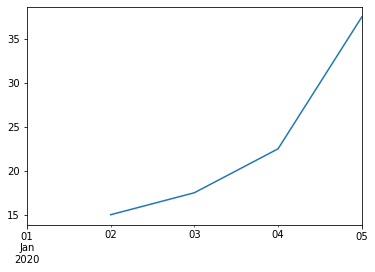

In [18]:
df2.rolling(2).mean()['Col1'].plot()

In [19]:
df2.expanding(3).mean()['Col1']

2020-01-01      NaN
2020-01-02      NaN
2020-01-03    15.00
2020-01-04    18.75
2020-01-05    24.00
Freq: D, Name: Col1, dtype: float64

## plot

In [20]:
from matplotlib import dates  

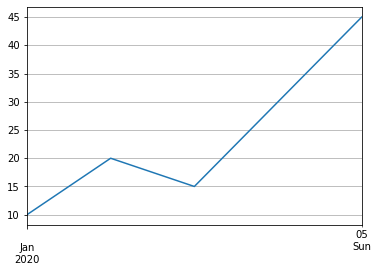

In [21]:
ax=df2['Col1'].plot()
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n%b\n%Y'))
